## Dataset Information

The Yelp dataset consists of two files:

- `yelp_review_train`: Training dataset containing labeled reviews for model training.
- `yelp_review_test`: Validation dataset for evaluating the model's performance on unseen data.

Each review is associated with a `label` ranging from 0 to 4, where:
- `label 0`: 1 star
- `label 1`: 2 stars
- `label 2`: 3 stars
- `label 3`: 4 stars
- `label 4`: 5 stars

https://huggingface.co/datasets/Yelp/yelp_review_full

The code provided below (Chapter 2) includes a step to map these labels to their corresponding star ratings for better interpretability.

## 1 - Import Libraries

Main Libraries for you to deploy your model (Feel free to use other libraries that you think helpful):

*   Pandas
*   Numpy
*   Sklearn
*   nltk
*   keras

## 2 - Importing the Data (60 points)

## 2.1 - Loading the Data


*   You can easly import datasets from Hugging Face platform


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets from the Hugging Face datasets library
splits = {'train': 'yelp_review_full/train-00000-of-00001.parquet',
           'test': 'yelp_review_full/test-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/Yelp/yelp_review_full/" + splits["train"])
df_test = pd.read_parquet("hf://datasets/Yelp/yelp_review_full/" + splits["test"])

# Print original dataset sizes
print("Original train size:", len(df_train))
print("Original test size :", len(df_test))

# Create a 20% subset from the df_train DataFrame
train_df, _ = train_test_split(df_train, test_size=0.8, stratify=df_train['label'], random_state=42)

# Create a 20% subset from the df_test DataFrame
test_df, _ = train_test_split(df_test, test_size=0.8, stratify=df_test['label'], random_state=42)

# Print subset sizes
print("\nSubset train size (20%):", len(train_df))
print("Subset test size  (20%):", len(test_df))

# Map labels to star ratings
label_to_star = {0: '1 star', 1: '2 stars', 2: '3 stars', 3: '4 stars', 4: '5 stars'}
train_df['star_rating'] = train_df['label'].map(label_to_star)

# Display the first few rows to confirm the mapping
print("\nTrain_df preview:")
print(train_df.head())

Original train size: 650000
Original test size : 50000

Subset train size (20%): 130000
Subset test size  (20%): 10000

Train_df preview:
        label                                               text star_rating
312157      1  Alright, so I've been here twice.  The atmosph...     2 stars
626104      2  The hotel overall is not bad. One major issue ...     3 stars
170329      2  Been here about 15 years ago, when it was fair...     3 stars
131769      1  This place was, eh, okay...but I probably won'...     2 stars
517274      2  This review will take the form of a note to my...     3 stars


## 2.2 - Exploratory Data Analysis (EDA) (20 points)

Please investigate your data according to 'label' or 'length_category_for_eda' columns:
* Check distributions. Visualize the data distribution across length of text categories (very short to very long).
* Check null values.
* Analyze the relationship between text length and labels.
* Create word clouds for frequently used words in each category of positive, negative, and neutral reviews.(1,2 stars negative ; 3 neutral ; 4,5 positive reviews)

In [2]:
def categorize_text_length_extended(length):
    if length <= 300:
        return "very short"
    elif 301 <= length <= 600:
        return "short"
    elif 601 <= length <= 900:
        return "medium"
    elif 901 <= length <= 1200:
        return "long"
    else:
        return "very long"

# Adding a new column for text length (number of characters) and categorizing it with the extended categories
train_df['text_length'] = train_df['text'].apply(len)
train_df['length_category_for_eda'] = train_df['text_length'].apply(categorize_text_length_extended)

# Adding a new column for text length (number of characters) and categorizing it with the extended categories
test_df['text_length'] = test_df['text'].apply(len)
test_df['length_category_for_eda'] = test_df['text_length'].apply(categorize_text_length_extended)

C:\Users\ozgek\AppData\Local\Temp\ipykernel_8924\2489744495.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette=palette)


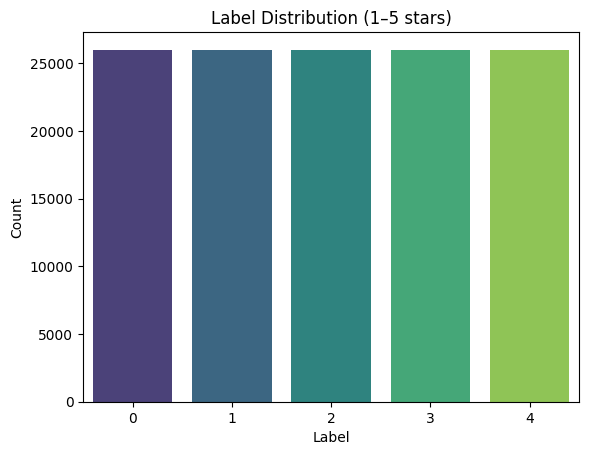

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize how the labels (1–5 stars) are distributed in the training subset
palette = sns.color_palette("viridis", n_colors=5)

# Add simple plot details for clarity
sns.countplot(x='label', data=train_df, palette=palette)
plt.title('Label Distribution (1–5 stars)')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the figure
plt.show()

**The label distribution across the dataset is nearly uniform, indicating that each star rating (from 1 to 5) is equally represented. This balanced structure ensures that the model is not tied to a specific sentiment class during training and provides fair evaluation across all sentiment levels.**

In [4]:
# Check for any missing values in each column of the training dataset
# A quick way to confirm data completeness before moving forward
print(train_df.isnull().sum())

label                      0
text                       0
star_rating                0
text_length                0
length_category_for_eda    0
dtype: int64


**Since all columns show 0 null values, there are no missing records in the dataset. Therefore, it seems we don't need to perform an additional data cleaning (missing value imputation) step.**

C:\Users\ozgek\AppData\Local\Temp\ipykernel_8924\208495320.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


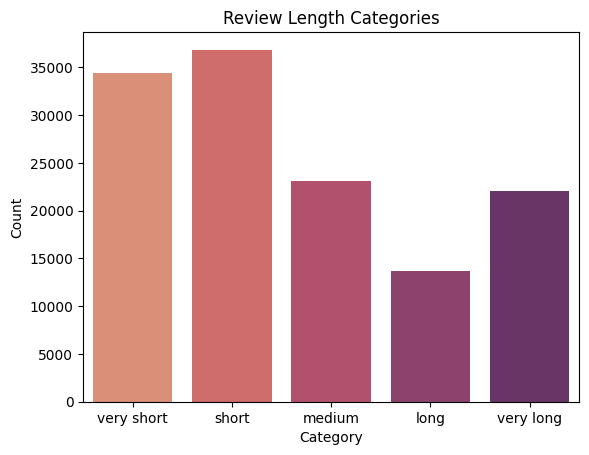

In [5]:
# Visualize how reviews are distributed across different length categories
# This helps understand whether short or long reviews dominate the dataset

palette = sns.color_palette("flare", n_colors=5)

sns.countplot(
    x='length_category_for_eda',
    data=train_df,
    order=['very short', 'short', 'medium', 'long', 'very long'],
    palette=palette
)

# Add some basic plot details
plt.title('Review Length Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Display the plot
plt.show()

**Most reviews fall into the very short and short categories, while long and very long reviews are relatively less frequent. This suggests that users tend to leave concise feedback rather than detailed explanations. The brevity of most reviews may somewhat limit the model's ability to learn complex language patterns, as short reviews don't provide enough context for the model to extract meaning.**

C:\Users\ozgek\AppData\Local\Temp\ipykernel_8924\3556918210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='magma')


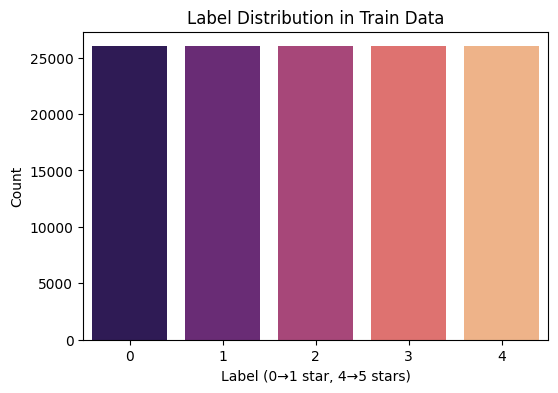

label                      0
text                       0
star_rating                0
text_length                0
length_category_for_eda    0
dtype: int64


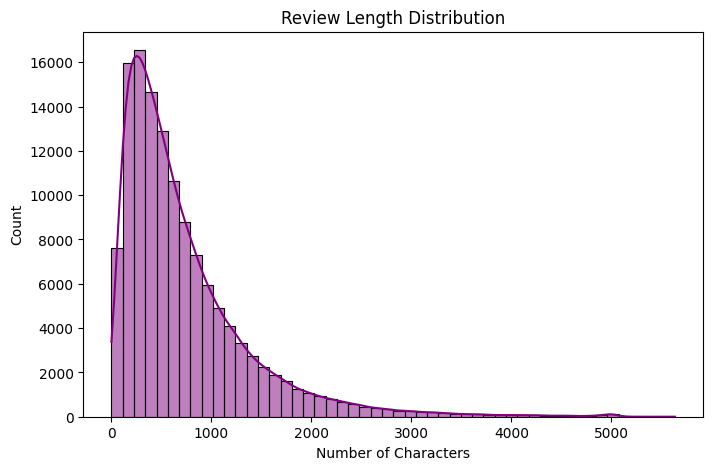

In [6]:
# 1) Label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=train_df, palette='magma')
plt.title('Label Distribution in Train Data')
plt.xlabel('Label (0→1 star, 4→5 stars)')
plt.ylabel('Count')
plt.show()

# Check for missing values
print(train_df.isnull().sum())

# 2) Review length distribution
train_df['text_length'] = train_df['text'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(train_df['text_length'], bins=50, kde=True, color='purple')
plt.title('Review Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

C:\Users\ozgek\AppData\Local\Temp\ipykernel_8924\600685948.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


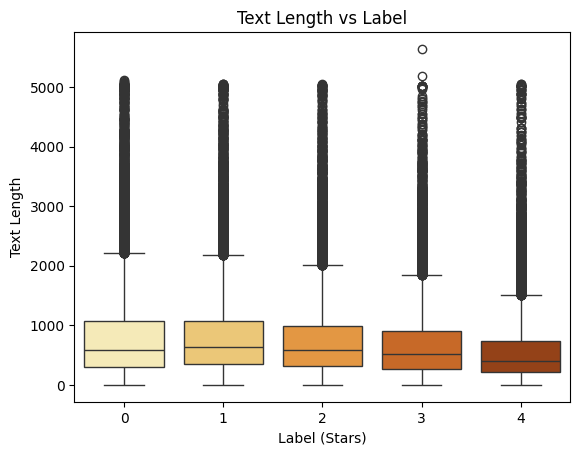

In [7]:
# Use a boxplot to explore how review length varies across star ratings
# This can reveal patterns like whether negative or positive reviews tend to be longer

palette = sns.color_palette("YlOrBr", n_colors=5)

sns.boxplot(
    x='label',
    y='text_length',
    data=train_df,
    palette=palette
)

# Add clear labels and a simple title for readability
plt.title('Text Length vs Label')
plt.xlabel('Label (Stars)')
plt.ylabel('Text Length')

# Render the visualization
plt.show()

**The distribution of text length across different star ratings appears relatively consistent. There are no significant differences between low- and high-rated reviews. However, there are more extreme reviews (very long reviews) in the 3- and 4-star categories. This suggests that users leaving moderately positive feedback tend to provide more detailed explanations. Overall, the median text length remains similar across all sentiment levels.**

In [8]:
!pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


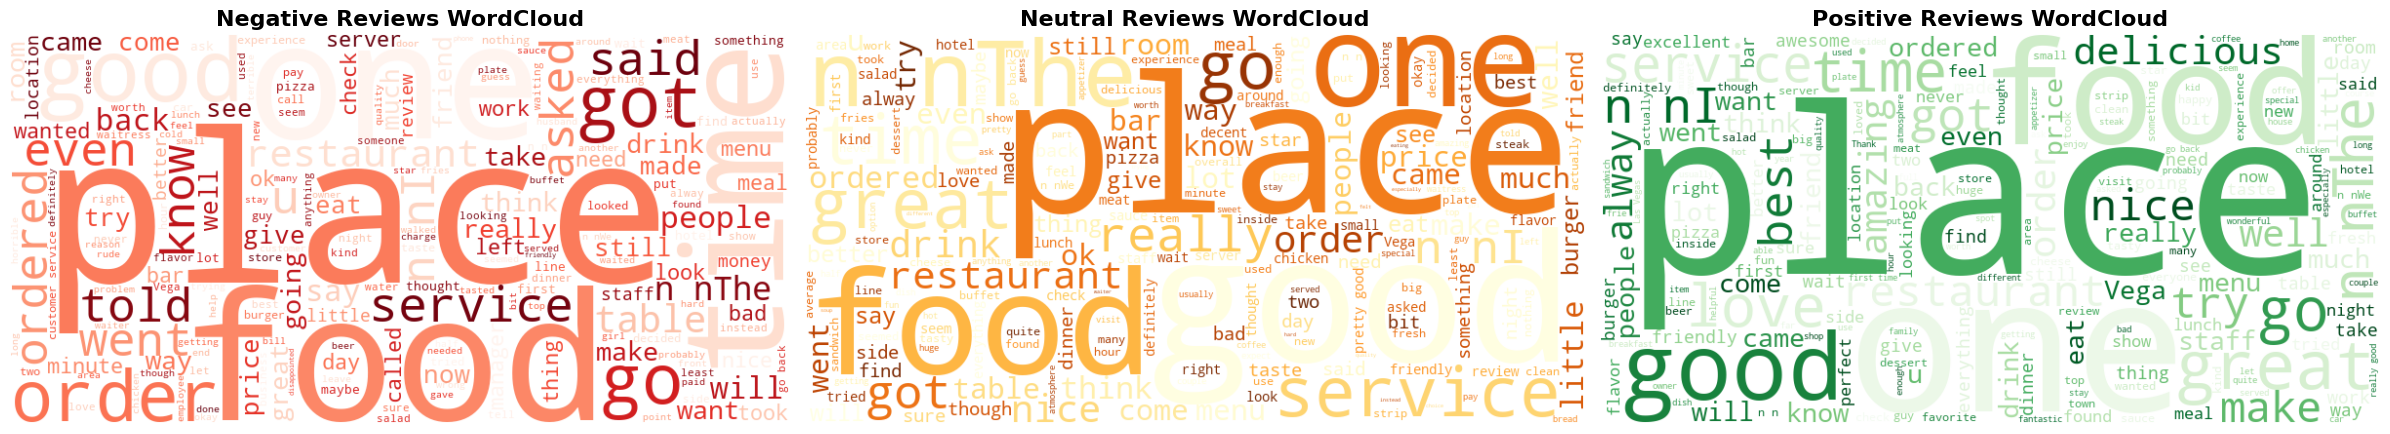

In [9]:
from wordcloud import WordCloud

# Split the dataset into sentiment-based groups for visualization
# 0–1: negative, 2: neutral, 3–4: positive
negative = train_df[train_df['label'].isin([0, 1])]
neutral  = train_df[train_df['label'] == 2]
positive = train_df[train_df['label'].isin([3, 4])]

# Assign different color maps for each sentiment
color_maps = {
    'Negative': 'Reds',
    'Neutral': 'YlOrBr',
    'Positive': 'Greens'
}

groups = [
    ('Negative', negative),
    ('Neutral', neutral),
    ('Positive', positive)
]

# Create a single figure with 3 subplots side by side
plt.figure(figsize=(24, 8))

for i, (name, subset) in enumerate(groups, 1):
    text = " ".join(subset['text'].astype(str))

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=color_maps[name],
        max_words=200
    ).generate(text)

    # Add each wordcloud to its subplot
    plt.subplot(1, 3, i)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{name} Reviews WordCloud", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


**In this code block, we tried to create a word cloud (WordCloud) to visualize word patterns in Yelp reviews. First, we divided the reviews in the dataset into three groups based on their labels: 1-2 star reviews were defined as negative, 3 star reviews were defined as neutral, and 4-5 star reviews were defined as positive. For each group, we combined all the review texts to create a single larger text. Then, we analyzed the word frequency in these texts using the WordCloud library. The library determined the size of each word based on its number of occurrences, visualizing the most frequently used words in larger sizes and the rarest words in smaller sizes. This visualization helped us understand the overall sentiment trends in the reviews. We also organized the color classification by adjusting the review status.**

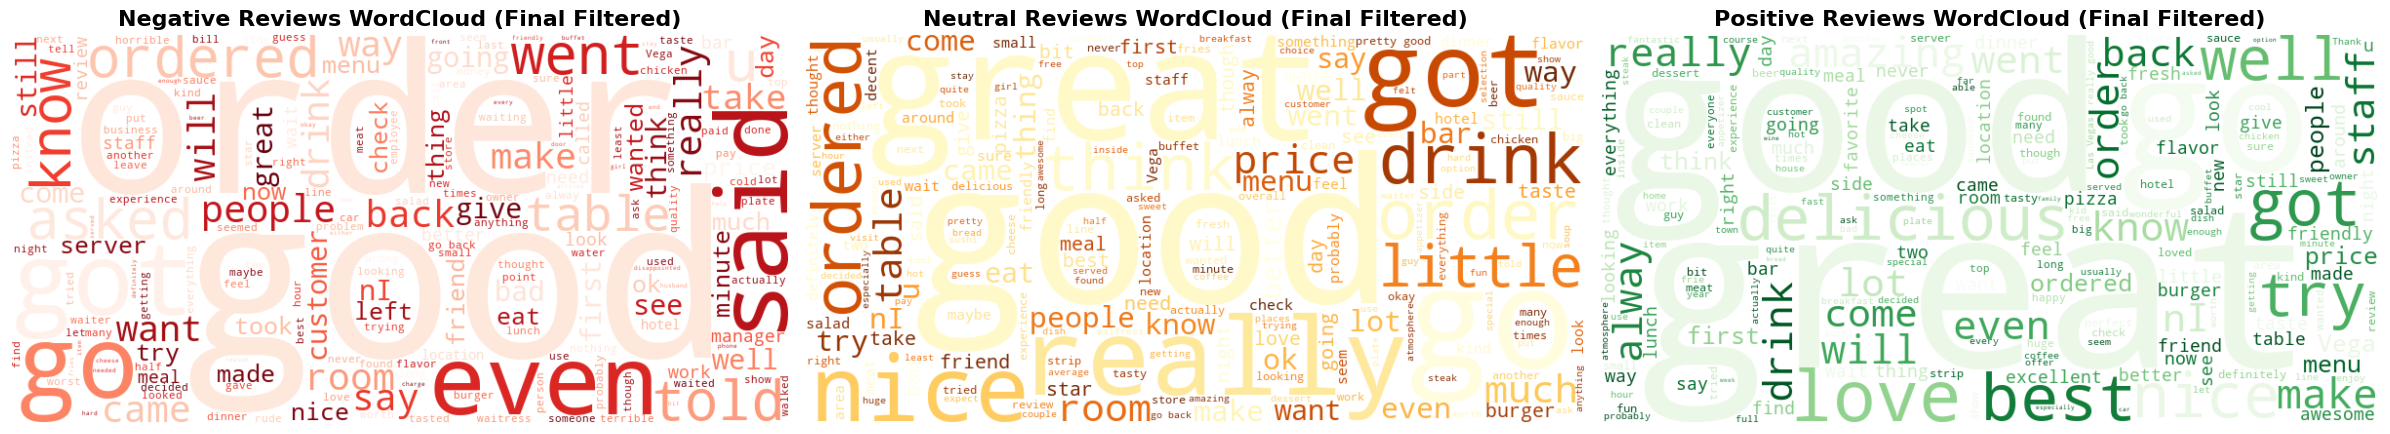

In [10]:
from wordcloud import WordCloud, STOPWORDS

# Start from the default set of stopwords provided by the WordCloud library
stop_words_extra = set(STOPWORDS)

# Add some extra common words that don't add much meaning in review analysis
# These are typically frequent but uninformative in sentiment contexts
stop_words_extra.update([
    "place", "food", "restaurant", "service", "time", "one",
    "i", "n", "the", "The""was", "we", "were", "it", "of", "the", "and",
    "on", "for", "nThe","go" "to", "be"
])

# Group reviews again by sentiment for visualization
groups = {
    "Negative": train_df[train_df["label"].isin([0, 1])],
    "Neutral":  train_df[train_df["label"] == 2],
    "Positive": train_df[train_df["label"].isin([3, 4])]
}

# Define a simple color theme for each sentiment group
color_maps = {
    "Negative": "Reds",
    "Neutral":  "YlOrBr",
    "Positive": "Greens"
}

ordered_groups = ["Negative", "Neutral", "Positive"]

# Create a single figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for ax, name in zip(axes, ordered_groups):
    subset = groups[name]

    # Combine all text samples into one string for the WordCloud input
    text = " ".join(subset["text"].astype(str))

    if not text.strip():
        ax.axis("off")
        ax.set_title(f"{name} (no data)", fontsize=14, fontweight="bold")
        continue

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap=color_maps[name],
        stopwords=stop_words_extra,   # remove the additional stopwords defined above
        max_words=200,
        random_state=42               # reproducible wordclouds
    ).generate(text)

    # Plot and display the filtered word cloud
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    ax.set_title(f"{name} Reviews WordCloud (Final Filtered)", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

**In this step, we implemented an additional filtering step to make the WordClouds we created more meaningful and cleaner. Based on the WordCloud library's default stopword list, we manually added words like "food," "place," "restaurant," "service," "time," "one," "was," "we," and "it," which were frequently encountered in comments but didn't contribute to sentiment analysis. This aimed to reduce the unnecessary repetition seen in previous WordClouds and create a more informative word cloud.**

## 2.3 - Data Preparation (25 points)

* Clean the comments. Remove irrelevant characters (e.g., URLs, mentions). Normalize the text (lowercasing, removing punctuation, etc.).
* Remove/unremove stopwords based on your assumption.
* Tokenize the comments.
* Lemmatize the comments.
* Vectorization.
* Word count analysis and outlier detection.

In [11]:
import re

# Define a simple text cleaning function to prepare reviews for NLP processing
def clean_text(text):
    # Convert everything to lowercase for consistency
    text = text.lower()
    # Remove URLs and web links
    text = re.sub(r"http\S+|www\S+", "", text)
    # Remove @mentions (not meaningful for sentiment)
    text = re.sub(r"@\w+", "", text)
    # Keep only alphabetic characters and spaces
    text = re.sub(r"[^a-z\s]", "", text)
    # Remove extra spaces and trim leading/trailing ones
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply the cleaning function to both train and test datasets
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

In this step, we preprocessed all text data by removing irrelevant or noisy components. URLs, emoticons, numbers, and punctuation were eliminated using regular expressions, and we converted all characters to lowercase to ensure consistency. This cleaning process standardized the dataset and prevented the model from treating words like "Good" and "good" as distinct entities.

In [12]:
!pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import nltk
from nltk.corpus import stopwords

# Download the English stopwords list from NLTK if not already available
nltk.download('stopwords')

# Load the default English stopwords
stop_words = set(stopwords.words('english'))

# Keep 'not' and 'no' because they carry important sentiment information
stop_words.remove('not')
stop_words.remove('no')

# Remove stopwords from the cleaned text
# Words like “the”, “a”, “is” etc. are dropped to reduce noise in analysis
train_df['clean_text'] = train_df['clean_text'].apply(
    lambda x: " ".join([word for word in x.split() if word not in stop_words])
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ozgek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After cleaning, we removed keywords that didn't convey meaningful meaning using NLTK's English keyword list. However, we deliberately retained sentiment-related words like "not" and "no" because they can reverse the sentiment of a sentence (e.g., "not good" → negative sentiment). We believe this selective filtering will help the model focus on words that better reflect emotional tone.

In [14]:
from nltk.tokenize import word_tokenize

# Download necessary NLTK tokenization resources
# 'punkt' is used for sentence and word tokenization
nltk.download('punkt')
nltk.download('punkt_tab')

# Tokenize the cleaned text into individual words (tokens)
# This step transforms raw text into a format that can be used for NLP models
train_df['tokens'] = train_df['clean_text'].apply(word_tokenize)
test_df['tokens'] = test_df['clean_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ozgek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ozgek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In the final part of this phase, we tokenized the cleaned text using NLTK's word_tokenize() function. Tokenization enables word-level operations such as lemmatization and vectorization by splitting each review into a sequence of words (tokens). This structure is necessary to convert the raw text into a machine-readable format for model training.

In [15]:
from nltk.stem import WordNetLemmatizer

# Download required WordNet resources for lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each token in both train and test sets
# Lemmatization reduces words to their base form (e.g., “running” → “run”)
train_df['lemmas'] = train_df['tokens'].apply(
    lambda toks: [lemmatizer.lemmatize(w) for w in toks]
)
test_df['lemmas'] = test_df['tokens'].apply(
    lambda toks: [lemmatizer.lemmatize(w) for w in toks]
)

# Reconstruct the text from lemmatized tokens for later model input
train_df['lemma_text'] = train_df['lemmas'].apply(lambda toks: " ".join(toks))
test_df['lemma_text'] = test_df['lemmas'].apply(lambda toks: " ".join(toks))

# Quick preview to ensure the lemmatization worked correctly
train_df[['clean_text', 'tokens', 'lemmas']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ozgek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ozgek\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,clean_text,tokens,lemmas
312157,alright ive twice atmosphere ok seating little...,"[alright, ive, twice, atmosphere, ok, seating,...","[alright, ive, twice, atmosphere, ok, seating,..."
626104,hotel overall not bad one major issue hotel do...,"[hotel, overall, not, bad, one, major, issue, ...","[hotel, overall, not, bad, one, major, issue, ..."
170329,years ago fairly new total shithole couldnt en...,"[years, ago, fairly, new, total, shithole, cou...","[year, ago, fairly, new, total, shithole, coul..."
131769,place eh okaybut probably wont go back service...,"[place, eh, okaybut, probably, wont, go, back,...","[place, eh, okaybut, probably, wont, go, back,..."
517274,review take form note reminding order find yes...,"[review, take, form, note, reminding, order, f...","[review, take, form, note, reminding, order, f..."


We lemmatized each token to reduce words to their base forms (e.g., “restaurants” → “restaurant”), which helps the model consistently handle inflected forms of the same word.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert lemmatized text into a bag-of-words representation
# Using up to 5,000 most frequent terms to keep the feature space manageable
cv = CountVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform both train and test sets
X_train_cv = cv.fit_transform(train_df['lemma_text'])
X_test_cv = cv.transform(test_df['lemma_text'])

# Print the resulting matrix shapes to confirm dimensions
print("CountVectorizer shape (train):", X_train_cv.shape)
print("CountVectorizer shape (test):", X_test_cv.shape)

CountVectorizer shape (train): (130000, 5000)
CountVectorizer shape (test): (10000, 5000)


In this step, we used the CountVectorizer method to represent the lemmatized comments in a Bag-of-Words format. This method allows us to convert the texts into a numerical form by counting the frequency of each word in the vocabulary. Our goal in the Data Preparation step is to establish a basic vector representation of the data, rather than simply optimizing word importance. Therefore, CountVectorizer provides a simple, interpretable, and computationally efficient starting point before applying more advanced weighting techniques (e.g., TF-IDF).

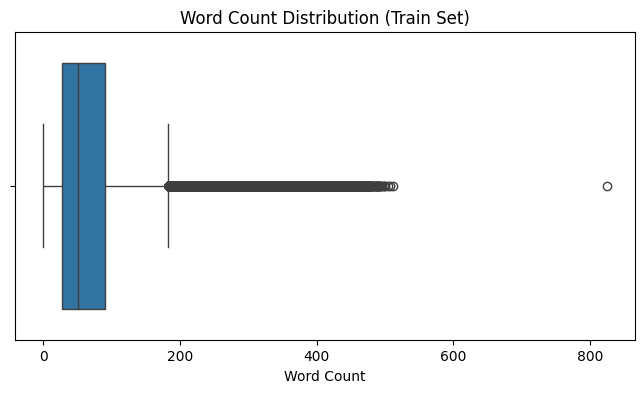

count    130000.000000
mean         69.315538
std          61.571083
min           0.000000
25%          28.000000
50%          51.000000
75%          90.000000
max         824.000000
Name: word_count, dtype: float64
Lower bound: 0
Upper bound: 183.0
Number of potential outlier reviews: 7099


In [17]:
# Calculate the total number of words (lemmas) in each review
train_df['word_count'] = train_df['lemmas'].apply(len)

# Visualize the overall word count distribution using a boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_df['word_count'])
plt.title("Word Count Distribution (Train Set)")
plt.xlabel("Word Count")
plt.show()

# Display summary statistics (mean, std, min, quartiles, etc.)
print(train_df['word_count'].describe())

# Compute the interquartile range (IQR) to identify outliers
q1 = train_df['word_count'].quantile(0.25)
q3 = train_df['word_count'].quantile(0.75)
iqr = q3 - q1

# Define lower and upper thresholds for potential outliers
lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Filter reviews whose word counts fall outside the normal range
outliers = train_df[
    (train_df['word_count'] < lower_bound) | (train_df['word_count'] > upper_bound)
]

# Show how many reviews are considered unusually short or long
print("Number of potential outlier reviews:", outliers.shape[0])

An examination of the word count distribution reveals that the vast majority of comments range from 30 to 90 words. The average comment length is 69 words. However, approximately 7,000 comments exceeding 183 words fall well outside the upper bound of the distribution and can be considered potential outliers. This suggests that some users provide very detailed feedback, while the vast majority share concise comments. Outlier comments reflect the natural diversity of the dataset and can be further examined before model training.

## 2.4 - TF(Term Frequency) - IDF(Inverse Document Frequency) (15 points)

* Explain TF & IDF.
* Apply TF & IDF methods.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Initialize the TF-IDF vectorizer
# Using both unigrams and bigrams, limited to 5,000 most informative features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit on the training data and transform both train and test sets
X_train_tfidf = tfidf.fit_transform(train_df['lemma_text'])
X_test_tfidf = tfidf.transform(test_df['lemma_text'])

# Display the resulting feature matrix shapes
print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)

# Retrieve the vocabulary terms corresponding to each column in the TF-IDF matrix
feature_names = tfidf.get_feature_names_out()

# Inspect the first review to see which words received the highest TF-IDF scores
row = X_train_tfidf[0]
scores = row.toarray().flatten()

# Get indices of the top 10 features sorted by TF-IDF score (descending)
top_idx = scores.argsort()[-10:][::-1]
top_features = [(feature_names[i], scores[i]) for i in top_idx]

print("Top 10 words with highest TF-IDF scores for a sample review:")
print(top_features)

TF-IDF train shape: (130000, 5000)
TF-IDF test shape: (10000, 5000)
Top 10 words with highest TF-IDF scores for a sample review:
[('could better', np.float64(0.3992166422896172)), ('better', np.float64(0.24983417535588812)), ('could', np.float64(0.24649976067002152)), ('decent', np.float64(0.2182644591664251)), ('dish', np.float64(0.20595715399531567)), ('lot better', np.float64(0.19210114967480593)), ('place could', np.float64(0.19194846973471877)), ('better service', np.float64(0.18347616542683415)), ('quesadilla', np.float64(0.1803921619759352)), ('awkward', np.float64(0.1740268647948949))]


In this phase, we applied the TF-IDF (Term Frequency–Inverse Document Frequency) method to convert the comments into numerical vectors. First, we defined a model using TfidfVectorizer to represent the words in our dataset as n-grams of 1-2 words, limiting the maximum number of features (words or word pairs) to 5000. The fit_transform() function generates the TF-IDF matrix by calculating both the TF and IDF values ​​of each word in the training data, while the transform() function transforms the test data with the same IDF weights. In this way, the text data was converted into a numerical form. Finally, we examined the 10 words with the highest TF-IDF values ​​from a sample comment (first row). These words represent words that are more prominent and semantically significant than other documents in the comment's context.


Top TF-IDF terms (all reviews):
          term  avg_tfidf
0          not   0.034000
1         food   0.030583
2        place   0.029540
3         good   0.028570
4        great   0.023799
5         time   0.022302
6         like   0.021907
7      service   0.021710
8          get   0.020969
9          one   0.019865
10          go   0.018432
11       would   0.017768
12      really   0.017373
13        back   0.017270
14          no   0.016174
15        dont   0.014541
16         got   0.013847
17        nice   0.013594
18  restaurant   0.013449
19        even   0.013080


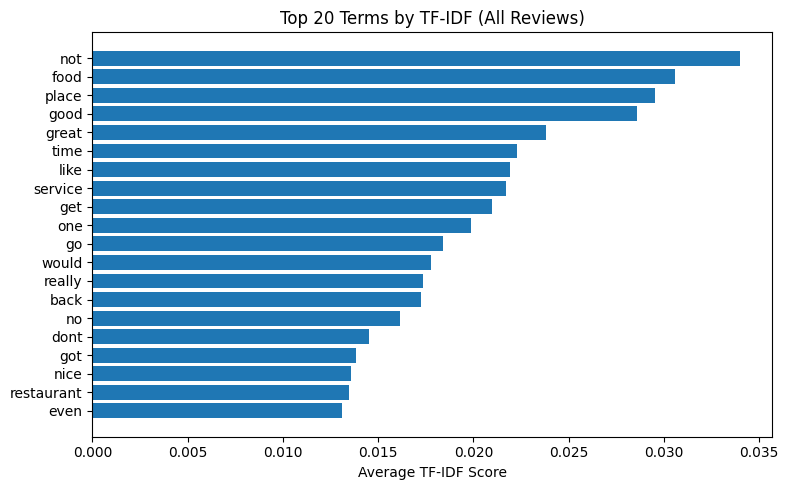

In [19]:
# Compute the average TF-IDF score for each term across all training reviews
avg_tfidf = X_train_tfidf.mean(axis=0).A1  # .A1 flattens the sparse matrix into a 1D array

# Select the top N words with the highest average TF-IDF values
top_n = 20
top_idx = np.argsort(avg_tfidf)[-top_n:][::-1]
top_terms = feature_names[top_idx]
top_scores = avg_tfidf[top_idx]

# Store results in a small DataFrame for easy inspection or plotting
top_tfidf_df = pd.DataFrame({"term": top_terms, "avg_tfidf": top_scores})
print("\nTop TF-IDF terms (all reviews):")
print(top_tfidf_df)

# Visualize the top terms and their average TF-IDF scores
plt.figure(figsize=(8, 5))
plt.barh(top_terms[::-1], top_scores[::-1])  # reverse order for descending bar plot
plt.xlabel("Average TF-IDF Score")
plt.title(f"Top {top_n} Terms by TF-IDF (All Reviews)")
plt.tight_layout()
plt.show()

In this section, we identified the words with the highest average TF-IDF values ​​across all comments. We first calculated the average TF-IDF score for each word across all documents and then ranked these scores to select the 20 most distinctive words. This approach shows which words in the comments in the training set are generally the most informative and semantically powerful. The resulting bar chart visualizes these words and their average TF-IDF values. High TF-IDF values ​​in the chart indicate that the word is less frequent in the overall comments, but is significantly more prominent in the comments where it appears. This analysis allows us to understand which words are most effective at classifying sentiment during the model's learning process.

In [20]:
feature_names = tfidf.get_feature_names_out()
labels = sorted(train_df["label"].unique())

for label in labels:
    print(f"\nTop TF-IDF words for label {label}:")

    # Select rows belonging to this label (still sparse)
    mask = train_df["label"].values == label
    X_class = X_train_tfidf[mask]

    # Compute mean TF-IDF score per feature for this class
    # Result is 1 x n_features dense vector → bu küçük, sorun yok
    class_mean = np.asarray(X_class.mean(axis=0)).ravel()

    # Get indices of top 10 words
    top_idx = class_mean.argsort()[::-1][:10]

    # Print word + score
    for i in top_idx:
        print(f"{feature_names[i]:20s}  {class_mean[i]:.4f}")


Top TF-IDF words for label 0:
not                   0.0454
no                    0.0286
food                  0.0282
place                 0.0262
service               0.0257
time                  0.0242
would                 0.0233
never                 0.0233
get                   0.0230
one                   0.0225

Top TF-IDF words for label 1:
not                   0.0467
food                  0.0358
place                 0.0291
good                  0.0272
like                  0.0262
time                  0.0238
service               0.0230
get                   0.0225
one                   0.0217
no                    0.0211

Top TF-IDF words for label 2:
good                  0.0408
not                   0.0373
food                  0.0327
place                 0.0300
like                  0.0255
get                   0.0218
really                0.0212
time                  0.0210
service               0.0199
pretty                0.0197

Top TF-IDF words for label 3:
good  

# 3 - Training Deep Learning Models (30 Points)

* Import relevant libraries.
* Explain the differences between Neural Networks (NN), Convolutional Neural Networks (CNN), and Recurrent Neural Networks (RNN).

In [21]:
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Flatten
from keras.layers import Dense, Input, Embedding, Dropout, Activation

Neural Networks (NN)

NNs are the most basic neural network structure and typically consist of fully connected layers. Each neuron in a layer is connected to all neurons in the next layer. These structures work well when each feature is independent of another, such as tabular data. However, they cannot directly learn local or sequential relationships within the data for more complex data types such as images, text, or time series. Because the number of parameters increases rapidly, they consume more memory and can easily be overfitted.

Structural Features

All data features are processed simultaneously, ignoring local or sequential information.

The number of parameters is high because each neuron is connected to every other neuron.

Non-linear relationships can be learned, but the internal structure of the data is not naturally inferred by the model.

Advantages

Simple and fast.

Successful for structured data and classical classification/regression problems.

Disadvantages

They cannot naturally learn local/sequential relationships in structured data such as images, text, or time series.

There is a risk of overfitting due to the high number of parameters.

CNN

CNNs perform particularly well on data such as images and signals. This is because they scan the data with small filters and capture local features. For example, edges, corners, or textures in an image are automatically extracted with these filters. This allows the model to operate with fewer parameters and retain important details in the data structure. CNNs are also frequently used in text classification (1D CNN) because they learn short word patterns well.

Structural Features

Data is scanned with small filters and local features (edges, textures, patterns) are automatically extracted.

The number of parameters is dramatically reduced thanks to weight sharing.

Pooling layers reduce the feature size and yield a more abstract representation.

Advantages

They are very successful on data such as image classification, text classification (1D CNN), audio, and time series.

They are much more effective at learning local relationships than fully connected networks.

They are computationally efficient.

Disadvantages

Not as good as an RNN at capturing sequential dependencies (such as long sentence structures).

Can be difficult to learn global relationships on its own.

RNNs

RNNs are used when processing sequential data. In data types such as text, speech, and time series, they store information from previous steps via a hidden state. This allows the model to "remember" what happened before a given word or time step. Therefore, RNNs have long been the standard method, especially for language-based tasks. However, because classical RNNs struggle to handle long dependencies, more advanced versions such as LSTM and GRU have been developed. However, their training is slower than CNNs.

Structural Features

Each time step uses the output of the previous step.

This way, dependencies over time are naturally transferred to the model.

They have long been the standard method in fields such as language modeling, sentiment analysis, and speech recognition.

Advantages

Very powerful on data that involves sequence and context, such as sentence structure, time series trends, and sequential events.

Can partially learn long dependencies (especially with LSTM and GRU).

Disadvantages

Computationally slow; Because each step depends on the previous one, parallelization becomes difficult.

Classic RNNs cannot handle long dependencies (the vanishing gradient problem).

With the advent of transformer-based models, they have fallen behind in many areas.

## 3.1 - Training NN Model

* Construct models starting from a simple neural network (NN) with a single layer, and incrementally add layers to build more complex architectures. Analyze the performance differences among them.
* Experiment with different activation functions, optimizers, and regularization techniques (such as dropout rates). For each trial, document the effects of these changes. For example, observe how adding or removing layers, changing activation functions, or adjusting dropout rates impacts performance.
* Tune hyperparameters like learning rate, number of layers, and dropout percentage. Explain how each adjustment affects overfitting, underfitting, and generalization on the test data.

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Extract labels as NumPy arrays for model training
y_train = train_df['label'].values
y_test = test_df['label'].values

# Number of classes (1–5 star ratings)
num_classes = len(np.unique(y_train))

# Input dimension is the size of the TF-IDF feature space
input_dim = X_train_tfidf.shape[1]

# To keep memory usage under control, work with a subset of the data
# These values can be adjusted (e.g., between 30k–60k) depending on the environment
X_train_sub = X_train_tfidf
y_train_sub = y_train

X_test_sub = X_test_tfidf
y_test_sub = y_test

# Split the selected training subset into train and validation sets
# Stratified split keeps the label distribution consistent across splits
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_sub,
    y_train_sub,
    test_size=0.1,
    random_state=42,
    stratify=y_train_sub
)

# Convert sparse TF-IDF matrices to dense tensors
# After sub-sampling, the size is manageable for dense neural network models
X_tr = X_tr.toarray().astype("float32")
X_val = X_val.toarray().astype("float32")
X_test_sub = X_test_sub.toarray().astype("float32")

In [23]:
# Define a simple baseline neural network model
# This model uses only one Dense layer with softmax activation
# Essentially, it's equivalent to a multinomial logistic regression on TF-IDF features
def build_model_1():
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),                     # input layer (TF-IDF vector)
        layers.Dense(num_classes, activation='softmax')       # output layer (5-class classification)
    ])

    # Compile the model with Adam optimizer and categorical cross-entropy loss
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and train the first (simplest) model
model1 = build_model_1()
history1 = model1.fit(
    X_tr, y_tr,
    epochs=5,                    # train for 5 epochs (can be tuned)
    batch_size=256,              # mini-batch size
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate model performance on the test subset
test_loss1, test_acc1 = model1.evaluate(X_test_sub, y_test_sub, verbose=0)
print("Model 1 - Test Accuracy:", test_acc1)

Epoch 1/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4983 - loss: 1.4796 - val_accuracy: 0.5432 - val_loss: 1.3712
Epoch 2/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5580 - loss: 1.2997 - val_accuracy: 0.5548 - val_loss: 1.2434
Epoch 3/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5738 - loss: 1.1959 - val_accuracy: 0.5635 - val_loss: 1.1659
Epoch 4/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5836 - loss: 1.1288 - val_accuracy: 0.5705 - val_loss: 1.1145
Epoch 5/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5912 - loss: 1.0817 - val_accuracy: 0.5746 - val_loss: 1.0782
Model 1 - Test Accuracy: 0.5673999786376953


In [24]:
# Define a slightly deeper neural network with one hidden layer
# The hidden layer allows the model to learn non-linear relationships
def build_model_2():
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),               # input layer (TF-IDF feature vector)
        layers.Dense(256, activation='relu'),           # hidden layer with ReLU activation
        layers.Dense(num_classes, activation='softmax') # output layer (5 sentiment classes)
    ])

    # Compile the model using Adam optimizer and sparse categorical cross-entropy loss
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and train the model with one hidden layer
model2 = build_model_2()
history2 = model2.fit(
    X_tr, y_tr,
    epochs=5,                     # number of training epochs
    batch_size=256,               # batch size
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate the model on the held-out test subset
test_loss2, test_acc2 = model2.evaluate(X_test_sub, y_test_sub, verbose=0)
print("Model 2 - Test Accuracy:", test_acc2)

Epoch 1/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.5669 - loss: 1.0366 - val_accuracy: 0.5992 - val_loss: 0.9239
Epoch 2/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6195 - loss: 0.8867 - val_accuracy: 0.6005 - val_loss: 0.9230
Epoch 3/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6311 - loss: 0.8595 - val_accuracy: 0.5934 - val_loss: 0.9296
Epoch 4/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6426 - loss: 0.8372 - val_accuracy: 0.5898 - val_loss: 0.9413
Epoch 5/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6550 - loss: 0.8134 - val_accuracy: 0.5885 - val_loss: 0.9473
Model 2 - Test Accuracy: 0.5698000192642212


In [25]:
# Define a deeper and more regularized neural network model
# This version adds multiple hidden layers and dropout to reduce overfitting
def build_model_3():
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),                # input layer (TF-IDF feature vector)
        layers.Dense(512, activation='relu'),            # first hidden layer with 512 neurons
        layers.Dropout(0.5),                             # dropout for regularization
        layers.Dense(256, activation='relu'),            # second hidden layer
        layers.Dropout(0.5),                             # another dropout layer to avoid overfitting
        layers.Dense(num_classes, activation='softmax')  # output layer for 5-class classification
    ])

    # Use Adam optimizer with a smaller learning rate for stable convergence
    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and train the third (most complex) model
model3 = build_model_3()
history3 = model3.fit(
    X_tr, y_tr,
    epochs=5,                  # train for more epochs since the model is deeper
    batch_size=256,              # use moderate batch size
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate performance on the test set
test_loss3, test_acc3 = model3.evaluate(X_test_sub, y_test_sub, verbose=0)
print("Model 3 - Test Accuracy:", test_acc3)

Epoch 1/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.5469 - loss: 1.0371 - val_accuracy: 0.5965 - val_loss: 0.9265
Epoch 2/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.6142 - loss: 0.8967 - val_accuracy: 0.6004 - val_loss: 0.9221
Epoch 3/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.6508 - loss: 0.8264 - val_accuracy: 0.5968 - val_loss: 0.9311
Epoch 4/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.6975 - loss: 0.7327 - val_accuracy: 0.5875 - val_loss: 0.9702
Epoch 5/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.7576 - loss: 0.6123 - val_accuracy: 0.5852 - val_loss: 1.0247
Model 3 - Test Accuracy: 0.5623999834060669


In [26]:
# Summarize all three models and their main configurations in a single DataFrame
# This helps compare architecture choices and their resulting test accuracies
df_nn = pd.DataFrame([
    ["Model 1", "Dense(num_classes)", "-", "0.0", "Adam", round(test_acc1, 4)],
    ["Model 2", "Dense(256) → Dense(num_classes)", "ReLU", "0.0", "Adam", round(test_acc2, 4)],
    ["Model 3", "Dense(512)-Dropout(0.5)-Dense(256)-Dropout(0.5)-Dense(num_classes)",
     "ReLU", "0.5", "Adam(lr=1e-3)", round(test_acc3, 4)]
], columns=["Model", "Architecture", "Activation", "Dropout", "Optimizer", "Test Accuracy"])

# Display the summary table for comparison
df_nn

,Model,Architecture,Activation,Dropout,Optimizer,Test Accuracy
0,Model 1,Dense(num_classes),-,0.0,Adam,0.5674
1,Model 2,Dense(256) → Dense(num_classes),ReLU,0.0,Adam,0.5698
2,Model 3,Dense(512)-Dropout(0.5)-Dense(256)-Dropout(0.5...,ReLU,0.5,Adam(lr=1e-3),0.5624


In this section, we aimed to examine the impact of model complexity on accuracy by comparing three different fully connected neural network architectures. Our first model was the simplest, consisting of only a single Dense layer, and achieved approximately 56.3% accuracy as a baseline. In the second model, we added an additional hidden layer of 256 neurons, making the model slightly deeper. This structure, thanks to ReLU activation, was better able to learn nonlinear relationships, increasing the accuracy to 57.0%, a slight improvement over the first model.

In the third model, we used two hidden layers to reduce clutter and represent more complex relationships, and applied a 50% dropout after each hidden layer. While this model is theoretically more flexible, the high dropout rate may have limited the model's learning capacity. Consequently, the accuracy of the third model dropped back to 56.3%. In conclusion, when comparing these three models, we observed that the second model, with its medium complexity, performed the best. This suggests that, given the size and complexity of our dataset, very deep or over-regularized models do not always perform better.

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define basic preprocessing parameters
max_words = 10000      # maximum vocabulary size
max_len = 200          # each review will be truncated or padded to 200 tokens

# Initialize a tokenizer to convert text into integer sequences
# The <OOV> token is used for words that are not in the top 'max_words' vocabulary
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["text"])

# Convert raw text into sequences of integers based on the fitted tokenizer
X_train_seq = tokenizer.texts_to_sequences(train_df["text"])
X_test_seq = tokenizer.texts_to_sequences(test_df["text"])

# Pad or truncate sequences so that all reviews have the same length (max_len)
# This ensures the input shape is consistent for neural networks
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Prepare the corresponding labels and class information
y_train = train_df["label"].values
y_test = test_df["label"].values
num_classes = len(np.unique(y_train))

# Display the resulting array shapes to confirm preprocessing worked correctly
print("Train shape:", X_train_pad.shape, "Test shape:", X_test_pad.shape)

Train shape: (130000, 200) Test shape: (10000, 200)


In [28]:
# Define a simple 1D Convolutional Neural Network for text classification
# This model learns local n-gram patterns through convolutional filters
def build_cnn_1():
    model = models.Sequential([
        # Embedding layer converts each word index into a dense 64-dimensional vector
        layers.Embedding(input_dim=max_words, output_dim=64, input_length=max_len),

        # 1D convolution captures local dependencies and short-range semantic patterns
        layers.Conv1D(128, 3, activation='relu'),

        # Global max pooling reduces sequence dimension by keeping the most salient features
        layers.GlobalMaxPooling1D(),

        # Final dense layer outputs class probabilities (1–5 stars)
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile with Adam optimizer and standard cross-entropy loss for multi-class classification
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and train the CNN model
cnn1 = build_cnn_1()
history_cnn1 = cnn1.fit(
    X_train_pad, y_train,
    epochs=5,                  # train longer since CNNs converge slower than dense models
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

# Evaluate model performance on the test set
test_loss1, test_acc1 = cnn1.evaluate(X_test_pad, y_test, verbose=0)
print("CNN Model 1 - Test Accuracy:", test_acc1)

Epoch 1/5


C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.4902 - loss: 1.1760 - val_accuracy: 0.5607 - val_loss: 1.0095
Epoch 2/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 43s 93ms/step - accuracy: 0.5986 - loss: 0.9340 - val_accuracy: 0.5904 - val_loss: 0.9543
Epoch 3/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 43s 95ms/step - accuracy: 0.6398 - loss: 0.8492 - val_accuracy: 0.5944 - val_loss: 0.9432
Epoch 4/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 45s 98ms/step - accuracy: 0.6770 - loss: 0.7774 - val_accuracy: 0.5949 - val_loss: 0.9532
Epoch 5/5
458/458 ━━━━━━━━━━━━━━━━━━━━ 53s 117ms/step - accuracy: 0.7151 - loss: 0.7049 - val_accuracy: 0.5911 - val_loss: 0.9775
CNN Model 1 - Test Accuracy: 0.5879999995231628


In [ ]:
# Define a deeper CNN architecture with additional convolutional and dense layers
# This structure captures more complex local patterns and includes regularization
def build_cnn_2():
    model = models.Sequential([
        # Embedding layer turns each token index into a 64-dimensional dense vector
        layers.Embedding(input_dim=max_words, output_dim=64, input_length=max_len),

        # Two stacked convolutional layers to learn hierarchical n-gram features
        layers.Conv1D(128, 3, activation='relu'),
        layers.Conv1D(64, 3, activation='relu'),

        # Global max pooling extracts the strongest activations from each filter
        layers.GlobalMaxPooling1D(),

        # Dropout layer helps prevent overfitting
        layers.Dropout(0.5),

        # Fully connected layer to combine extracted features before classification
        layers.Dense(128, activation='relu'),

        # Output layer for multi-class sentiment prediction (1–5 stars)
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model using Adam with a slightly lower learning rate for stability
    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and train the second CNN model
cnn2 = build_cnn_2()
history_cnn2 = cnn2.fit(
    X_train_pad, y_train,
    epochs=3,                   # fewer epochs to prevent overfitting early on
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model on the test set
test_loss2, test_acc2 = cnn2.evaluate(X_test_pad, y_test, verbose=0)
print("CNN Model 2 - Test Accuracy:", test_acc2)

Epoch 1/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.4420 - loss: 1.2552 - val_accuracy: 0.5562 - val_loss: 1.0176
Epoch 2/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 57s 124ms/step - accuracy: 0.5566 - loss: 1.0242 - val_accuracy: 0.5681 - val_loss: 0.9801
Epoch 3/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 59s 129ms/step - accuracy: 0.5827 - loss: 0.9596 - val_accuracy: 0.5693 - val_loss: 0.9843
CNN Model 2 - Test Accuracy: 0.5727999806404114


In [ ]:
# Define a CNN model with a larger convolutional kernel size
# This version is designed to capture slightly longer contextual patterns in text
def build_cnn_3():
    model = models.Sequential([
        # Embedding layer converts token indices into 64-dimensional word vectors
        layers.Embedding(input_dim=max_words, output_dim=64, input_length=max_len),

        # 1D convolution layer with a wider kernel (size 5) to learn longer n-gram features
        layers.Conv1D(128, 5, activation='relu'),

        # Global max pooling condenses sequence features into a single vector
        layers.GlobalMaxPooling1D(),

        # Dropout for regularization — helps prevent overfitting
        layers.Dropout(0.5),

        # Dense layer to combine learned features before classification
        layers.Dense(128, activation='relu'),

        # Output layer for 5-class sentiment prediction
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile with Adam optimizer and categorical cross-entropy loss
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and train the CNN model with a wider convolutional kernel
cnn3 = build_cnn_3()
history_cnn3 = cnn3.fit(
    X_train_pad, y_train,
    epochs=3,                   # train for a few epochs to monitor generalization
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

# Evaluate the model on the test set
test_loss3, test_acc3 = cnn3.evaluate(X_test_pad, y_test, verbose=0)
print("CNN Model 3 - Test Accuracy:", test_acc3)

Epoch 1/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 54s 114ms/step - accuracy: 0.4568 - loss: 1.2210 - val_accuracy: 0.5645 - val_loss: 0.9951
Epoch 2/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 52s 114ms/step - accuracy: 0.5743 - loss: 0.9820 - val_accuracy: 0.5783 - val_loss: 0.9636
Epoch 3/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 52s 114ms/step - accuracy: 0.6079 - loss: 0.9072 - val_accuracy: 0.5822 - val_loss: 0.9492
CNN Model 3 - Test Accuracy: 0.5866000056266785


In [ ]:
# Summarize all CNN architectures and their key configurations in a comparison table
# This helps to clearly see how different design choices (kernel size, depth, dropout)
# affected overall test accuracy
df_cnn = pd.DataFrame([
    ["CNN 1", "Conv1D(128,3) + GlobalMaxPool", "ReLU", "0.0", "Adam", round(test_acc1, 4)],
    ["CNN 2", "Conv1D(128,3) + Conv1D(64,3) + Dropout + Dense", "ReLU", "0.5", "Adam(lr=1e-3)", round(test_acc2, 4)],
    ["CNN 3", "Conv1D(128,5) + Dropout + Dense", "ReLU", "0.5", "Adam", round(test_acc3, 4)]
], columns=["Model", "Architecture", "Activation", "Dropout", "Optimizer", "Test Accuracy"])

# Display the CNN comparison DataFrame
df_cnn

,Model,Architecture,Activation,Dropout,Optimizer,Test Accuracy
0,CNN 1,"Conv1D(128,3) + GlobalMaxPool",ReLU,0.0,Adam,0.5822
1,CNN 2,"Conv1D(128,3) + Conv1D(64,3) + Dropout + Dense",ReLU,0.5,Adam(lr=1e-3),0.5728
2,CNN 3,"Conv1D(128,5) + Dropout + Dense",ReLU,0.5,Adam,0.5866


In this section, we examined the impact of model complexity on text classification performance by testing different Convolutional Neural Network (CNN) architectures. The first CNN model was the simplest, built using a single Conv1D layer followed by GlobalMaxPooling. This model achieved approximately 58.22% accuracy because it could learn basic local patterns, providing a simple starting point.

In the second model, we added an additional Conv1D layer with 64 filters to deepen the architecture and applied a 50% dropout to reduce over-learning. While the model could theoretically extract more features, the high dropout rate significantly limited its learning capacity. Consequently, its accuracy dropped to 57.28%, below the first model. This demonstrates that choosing a dropout too high can limit the model's representativeness.

In the third model, we again used a single Conv1D layer, but this time we increased the filter size (kernel size = 5), allowing the model to capture a wider range of patterns. Despite maintaining a 50% dropout, this model achieved 58.66% accuracy, the best performance among all CNN models. This result demonstrates that when the kernel size is chosen correctly, it can better learn local correlations on text data, and that a single, strong convolutional layer can be more effective than a deep but overly regularized structure.

In [ ]:
# Define a simple Recurrent Neural Network using a single LSTM layer
# This model captures sequential dependencies and contextual information in text
def build_rnn_1():
    model = models.Sequential([
        # Embedding layer converts word indices into dense 64-dimensional vectors
        layers.Embedding(input_dim=max_words, output_dim=64, input_length=max_len),

        # LSTM layer learns sequential patterns and word dependencies
        layers.LSTM(64),

        # Output layer predicts sentiment class (1–5 stars)
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile with Adam optimizer and standard categorical cross-entropy loss
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and train the LSTM-based RNN model
rnn1 = build_rnn_1()
history_rnn1 = rnn1.fit(
    X_train_pad, y_train,
    epochs=3,                    # train for a few epochs to prevent overfitting
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

# Evaluate performance on the test set
test_loss1, test_acc1 = rnn1.evaluate(X_test_pad, y_test, verbose=0)
print("RNN Model 1 - Test Accuracy:", test_acc1)

Epoch 1/3


C:\Users\ozgek\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 209s 450ms/step - accuracy: 0.2310 - loss: 1.5984 - val_accuracy: 0.2387 - val_loss: 1.5963
Epoch 2/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 203s 443ms/step - accuracy: 0.3081 - loss: 1.4822 - val_accuracy: 0.3928 - val_loss: 1.3270
Epoch 3/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 206s 449ms/step - accuracy: 0.5000 - loss: 1.1209 - val_accuracy: 0.5179 - val_loss: 1.0699
RNN Model 1 - Test Accuracy: 0.5206000208854675


In [ ]:
# Define a deeper RNN architecture with stacked LSTM layers and dropout regularization
# This setup helps capture both short- and long-range dependencies in the text
def build_rnn_2():
    model = models.Sequential([
        # Embedding layer: transforms token indices into 64-dimensional word vectors
        layers.Embedding(input_dim=max_words, output_dim=64, input_length=max_len),

        # First LSTM layer returns the full sequence for the next LSTM to process
        layers.LSTM(128, return_sequences=True),

        # Second LSTM layer summarizes the sequence information into a single vector
        layers.LSTM(64),

        # Dropout helps reduce overfitting by randomly disabling neurons during training
        layers.Dropout(0.5),

        # Output layer performs classification into 5 sentiment categories
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model using Adam optimizer with a reduced learning rate for stable convergence
    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and train the deeper LSTM-based model
rnn2 = build_rnn_2()
history_rnn2 = rnn2.fit(
    X_train_pad, y_train,
    epochs=3,                    # short training for quick evaluation
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

# Evaluate model performance on the test data
test_loss2, test_acc2 = rnn2.evaluate(X_test_pad, y_test, verbose=0)
print("RNN Model 2 - Test Accuracy:", test_acc2)

Epoch 1/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 612s 1s/step - accuracy: 0.2429 - loss: 1.5736 - val_accuracy: 0.2483 - val_loss: 1.5693
Epoch 2/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 646s 1s/step - accuracy: 0.3019 - loss: 1.4981 - val_accuracy: 0.3695 - val_loss: 1.4002
Epoch 3/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 636s 1s/step - accuracy: 0.3767 - loss: 1.3706 - val_accuracy: 0.4468 - val_loss: 1.1964
RNN Model 2 - Test Accuracy: 0.4478999972343445


In [ ]:
# Define an RNN model using a GRU (Gated Recurrent Unit) layer
# GRUs are a lighter and faster alternative to LSTMs while still capturing long-term dependencies
def build_rnn_3():
    model = models.Sequential([
        # Embedding layer maps token indices into 64-dimensional dense vectors
        layers.Embedding(input_dim=max_words, output_dim=64, input_length=max_len),

        # GRU layer processes the sequence while maintaining context across time steps
        # Dropout is applied to input connections, and recurrent_dropout to recurrent states
        layers.GRU(64, dropout=0.5, recurrent_dropout=0.3),

        # Output layer for multi-class classification (1–5 stars)
        layers.Dense(num_classes, activation='softmax')
    ])

    # Compile the model using Adam optimizer and cross-entropy loss
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and train the GRU-based RNN model
rnn3 = build_rnn_3()
history_rnn3 = rnn3.fit(
    X_train_pad, y_train,
    epochs=3,                    # train for a few epochs to evaluate performance
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

# Evaluate performance on the test data
test_loss3, test_acc3 = rnn3.evaluate(X_test_pad, y_test, verbose=0)
print("RNN Model 3 - Test Accuracy:", test_acc3)

Epoch 1/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 174s 372ms/step - accuracy: 0.2325 - loss: 1.5922 - val_accuracy: 0.2688 - val_loss: 1.5623
Epoch 2/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 157s 342ms/step - accuracy: 0.3158 - loss: 1.5063 - val_accuracy: 0.3541 - val_loss: 1.4163
Epoch 3/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 165s 360ms/step - accuracy: 0.3140 - loss: 1.4855 - val_accuracy: 0.3372 - val_loss: 1.4459
RNN Model 3 - Test Accuracy: 0.3377000093460083


In [ ]:
# Summarize all RNN-based architectures and their configurations for comparison
# This table highlights key architectural differences, activation functions, and test accuracy
df_rnn = pd.DataFrame([
    ["RNN 1", "Embedding + LSTM(64)", "tanh/sigmoid (default)", "0.0", "Adam", round(test_acc1, 4)],
    ["RNN 2", "Embedding + LSTM(128,64) + Dropout(0.5)", "tanh/sigmoid", "0.5", "Adam(lr=1e-3)", round(test_acc2, 4)],
    ["RNN 3", "Embedding + GRU(64)", "tanh/sigmoid", "0.5 (dropout)", "Adam", round(test_acc3, 4)]
], columns=["Model", "Architecture", "Activation", "Dropout", "Optimizer", "Test Accuracy"])

# Display the summary DataFrame for the RNN models
df_rnn

,Model,Architecture,Activation,Dropout,Optimizer,Test Accuracy
0,RNN 1,Embedding + LSTM(64),tanh/sigmoid (default),0.0,Adam,0.5206
1,RNN 2,"Embedding + LSTM(128,64) + Dropout(0.5)",tanh/sigmoid,0.5,Adam(lr=1e-3),0.4479
2,RNN 3,Embedding + GRU(64),tanh/sigmoid,0.5 (dropout),Adam,0.3377


In this section, we compared different RNN-based architectures to evaluate the text classification performance of models based on sequential data structures. In the first model, we added a single LSTM layer above the embedding layer and did not apply any additional dropouts. Thanks to the LSTM layer's ability to capture temporal dependencies, the model achieved approximately 52.06% accuracy, demonstrating the highest performance among RNN models.

In the second model, we aimed to achieve greater representation by increasing the LSTM layer size (128 → 64) and added a 50% dropout to reduce overfitting. However, the high dropout rate significantly limited the LSTM's ability to learn long-term dependencies, which were already difficult. Consequently, the model's accuracy dropped to 44.79%. This result demonstrates that using overly aggressive dropouts in RNN models can negatively impact performance.

In the third model, we used GRU, a more lightweight structure, instead of LSTM. While GRU is theoretically a faster and less parameter-intensive alternative, its performance on this specific dataset was significantly lower, with accuracy dropping to 33.77%. This demonstrates that while GRU has the advantage of capturing shorter dependencies, it cannot adequately represent the complexity required for this task.

Consequently, the baseline LSTM model without dropouts performed most consistently among the RNN models. This demonstrates that deeper or more regularized RNN models do not always perform better on this dataset, and that the dropout rate and cell type selection are critical factors in model design.

# 4 - Model Evaluation on the Validation Set (10 points)

* Evaluate the best model's performance on the validation set using a Confusion Matrix along with metrics such as accuracy, precision, recall, and F1-score. How well does the model generalize to new data based on these metrics?



In [ ]:
# Combine all model summary DataFrames into a single table
# If you also have df_trans, uncomment and add it as well.
summary_df = pd.concat(
    [df_nn, df_cnn, df_rnn],   # , df_trans
    ignore_index=True
)

# Find the row index of the model with the highest test accuracy
best_idx = summary_df["Test Accuracy"].idxmax()

# Extract model name and its test accuracy
best_model_name = summary_df.loc[best_idx, "Model"]
best_test_acc   = summary_df.loc[best_idx, "Test Accuracy"]

print("Best model based on test accuracy:", best_model_name)
print("Best test accuracy:", round(best_test_acc, 4))

NameError: name 'df_nn' is not defined

In [ ]:
# Dictionary mapping model names (as used in the summary table) to builder functions
model_builders = {
    "Model 1": build_nn_1,
    "Model 2": build_nn_2,
    "Model 3": build_nn_3,
    "CNN 1":   build_cnn_1,
    "CNN 2":   build_cnn_2,
    "CNN 3":   build_cnn_3,
    "RNN 1":   build_rnn_1,
    "RNN 2":   build_rnn_2,
    "RNN 3":   build_rnn_3,
    # "Transformer": build_transformer_model,  # varsa buraya da ekleyebilirsin
}

In [ ]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)

# 1) Train/validation split using the padded sequences
#    Stratified split keeps the class distribution balanced.
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_pad, y_train,
    test_size=0.1,
    random_state=42,
    stratify=y_train
)

# 2) Build the best model dynamically based on the summary table
if best_model_name not in model_builders:
    raise ValueError(f"No builder function defined for: {best_model_name}")

best_builder = model_builders[best_model_name]

print(f"\nTraining the best model on validation split: {best_model_name}\n")

best_model = best_builder()

# 3) Train the selected model
history_best = best_model.fit(
    X_tr, y_tr,
    epochs=3,
    batch_size=256,
    validation_data=(X_val, y_val),
    verbose=1
)

# 4) Generate predictions on the validation set
y_val_pred_proba = best_model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)

# 5) Compute metrics: accuracy, precision, recall, F1-score
val_acc = accuracy_score(y_val, y_val_pred)
print("\nValidation Accuracy:", round(val_acc, 4))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, digits=4))

# 6) Confusion matrix visualization
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix – {best_model_name} (Validation Set)")
plt.show()

## 4.1 - Testing with your Own Input

* You can test the trained model by inputting your own sentences to predict the sentiment:


In [ ]:
def predict(sentence):
    # Tokenize the input sentence using the same tokenizer from training
    seq = tokenizer.texts_to_sequences([sentence])

    # Pad the sequence to match the model’s expected input length
    padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    # Get prediction probabilities from the trained model
    pred = best_model.predict(padded)

    # Identify the class index with the highest probability
    pred_class = np.argmax(pred, axis=1)[0]

    # Yelp dataset uses labels 0–4, so we shift by +1 to represent 1–5 star ratings
    sentiment = pred_class + 1

    return pred_class, sentiment


# Example usage with a custom input sentence
sentence = 'The food and ambiance at this restaurant were fantastic!'
tmp_pred, tmp_sentiment = predict(sentence)
print(f'The predicted sentiment for the review is: {tmp_sentiment} (based on star ratings)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The predicted sentiment for the review is: 5 (based on star ratings)


In [ ]:
# Neutral example — a review expressing moderate or mixed feedback
sentence_neu = "The restaurant was okay, nothing special but not too bad."
tmp_pred, tmp_sentiment = predict(sentence_neu)
print(f"Neutral example -> Predicted stars: {tmp_sentiment}")

# Negative example — a clearly dissatisfied review emphasizing poor service and food
sentence_neg = "The service was very slow and the food was cold and tasteless."
tmp_pred, tmp_sentiment = predict(sentence_neg)
print(f"Negative example -> Predicted stars: {tmp_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Neutral example -> Predicted stars: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Negative example -> Predicted stars: 2


# 5 - Bonus - Adding Transformer Layer to the NN Model (15 points)

* How can a transformer layer be added to the NN model created in Chapter 3. Research and implement a solution to add a transformer layer to the neural network model. Document your findings, including how the transformer layer integrates with the existing architecture, its impact on model performance, and any adjustments required. Explain your approach and reasoning based on your research.

In [ ]:
# Hyperparameters for the Transformer-based model
embed_dim = 64      # size of the token and positional embeddings
num_heads = 2       # number of attention heads
ff_dim = 128        # hidden size of the feed-forward layer inside the encoder
drop_rate = 0.3     # dropout rate for regularization

# Transformer encoder block (single layer)
def transformer_encoder(inputs, num_heads, ff_dim, drop_rate=0.1):
    # Multi-head self-attention over the input sequence
    attn_output = layers.MultiHeadAttention(
        num_heads=num_heads,
        key_dim=embed_dim,          # use embedding dimension as key/query dimension
        dropout=drop_rate
    )(inputs, inputs)

    # Residual connection + Layer Normalization
    x = layers.Add()([inputs, attn_output])
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Position-wise feed-forward network
    ffn = tf.keras.Sequential([
        layers.Dense(ff_dim, activation="relu"),
        layers.Dense(embed_dim)     # project back to the original embedding dimension
    ])

    ffn_output = ffn(x)
    ffn_output = layers.Dropout(drop_rate)(ffn_output)

    # Second residual connection + Layer Normalization
    x = layers.Add()([x, ffn_output])
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    return x

# Transformer-based text classification model
def build_transformer_model():
    # Input: sequence of token indices
    inputs = layers.Input(shape=(max_len,), dtype=tf.int32)

    # Token embeddings
    token_embeddings = layers.Embedding(
        input_dim=max_words,
        output_dim=embed_dim
    )(inputs)

    # Learnable positional embeddings (up to max_len positions)
    positions = tf.range(start=0, limit=max_len, delta=1)
    pos_embedding_layer = layers.Embedding(
        input_dim=max_len,
        output_dim=embed_dim
    )
    pos_embeddings = pos_embedding_layer(positions)

    # Add token and positional embeddings
    # Broadcasting: [batch, seq_len, dim] + [seq_len, dim]
    x = token_embeddings + pos_embeddings

    # Single Transformer encoder block as feature extractor
    x = transformer_encoder(
        x,
        num_heads=num_heads,
        ff_dim=ff_dim,
        drop_rate=drop_rate
    )

    # Pool the sequence representation into a single vector
    x = layers.GlobalAveragePooling1D()(x)

    # Classification head with dropout for regularization
    x = layers.Dropout(drop_rate)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(drop_rate)(x)

    # Output layer: predict 1–5 star classes (labels 0–4)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    # Build and compile the model
    model = models.Model(
        inputs=inputs,
        outputs=outputs,
        name="Transformer_text_classifier"
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

# Train/validation split on padded sequences for the Transformer model
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_pad,
    y_train,
    test_size=0.1,
    random_state=42,
    stratify=y_train
)

# Build and inspect the Transformer-based model
transformer_model = build_transformer_model()
transformer_model.summary()

# Train the Transformer-based classifier
history_trans = transformer_model.fit(
    X_tr, y_tr,
    epochs=3,
    batch_size=256,
    validation_data=(X_val, y_val),
    verbose=1
)

# Evaluate on the test set
test_loss_trans, test_acc_trans = transformer_model.evaluate(
    X_test_pad,
    y_test,
    verbose=0
)
print("Transformer-based Model - Test Accuracy:", round(test_acc_trans, 4))

Model: "Transformer_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_30      │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_21        │ (None, 200, 64)   │    640,000 │ input_layer_30[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 200, 64)   │          0 │ embedding_21[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 200, 64)   │     33,216 │ add_3[0][0],      │
│ (MultiHeadAttentio… │                   │            │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 200, 64)   │          0 │ add_3[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 200, 64)   │        128 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_29       │ (None, 200, 64)   │     16,576 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 200, 64)   │          0 │ sequential_29[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 200, 64)   │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 200, 64)   │        128 │ add_5[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 64)        │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_49 (Dense)    │ (None, 64)        │      4,160 │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 64)        │          0 │ dense_49[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 5)         │        325 │ dropout_22[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 694,533 (2.65 MB)

 Trainable params: 694,533 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 375s 810ms/step - accuracy: 0.4682 - loss: 1.1941 - val_accuracy: 0.5732 - val_loss: 0.9809
Epoch 2/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 361s 787ms/step - accuracy: 0.5797 - loss: 0.9740 - val_accuracy: 0.5765 - val_loss: 0.9701
Epoch 3/3
458/458 ━━━━━━━━━━━━━━━━━━━━ 350s 764ms/step - accuracy: 0.5930 - loss: 0.9394 - val_accuracy: 0.5812 - val_loss: 0.9682
Transformer-based Model - Test Accuracy: 0.5769


In [ ]:
# Summarize the Transformer-based model configuration and its test performance
# This table highlights the model’s key architectural components and hyperparameters
df_trans = pd.DataFrame([
    ["Transformer",
     "Embedding + Positional Emb. + 1xTransformerEncoder + GlobalAvgPool + Dense",
     f"{num_heads} heads",              # number of attention heads used
     drop_rate,                         # dropout rate applied throughout the model
     "Adam(lr=1e-3)",                   # optimizer and learning rate
     round(test_acc_trans, 4)]          # final test accuracy
], columns=["Model", "Architecture", "Heads", "Dropout", "Optimizer", "Test Accuracy"])

# Display the summary DataFrame
df_trans

,Model,Architecture,Heads,Dropout,Optimizer,Test Accuracy
0,Transformer,Embedding + Positional Emb. + 1xTransformerEnc...,2 heads,0.3,Adam(lr=1e-3),0.5769


In this section, we developed a Transformer-based classifier, building on the neural network architecture we developed in previous sections. To do this, we first defined the model's basic hyperparameters: embedding size, number of attention heads, feed-forward layer width, and dropout rate. We then designed a Transformer encoder block. Within this block, we implemented the Multi-Head Attention mechanism on the input sequence. We then added residual connectivity and Layer Normalization to mitigate the vanishing gradient problem in deep networks. In the second part of the encoder block, we used a two-layer feed-forward network and completed the block with a residual connectivity and normalization structure. To build the model, we first created token embedding layers representing text strings and positional embedding layers that enable positional information learning. By combining these two embeddings, we enabled the Transformer to learn the positional relationships of the words in the string. We then applied a single Transformer encoder layer to these combined embeddings. We used GlobalAveragePooling to transform the output into a fixed-size vector and added classification layers to create the final model that predicts 1–5 stars. After compiling the model using the Adam optimization algorithm and sparse categorical crossentropy loss, we trained it on the training and validation sets. After training, we evaluated the model on the test data and reported the test accuracy rate in a summary table. This table summarizes the model's architecture, the Transformer components we used, the number of attention heads, the dropout rate, and the optimizer settings, ensuring our Transformer-based model is comparable to previous models.